<a href="https://colab.research.google.com/github/uditi-12/ML_project/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
df_train = pd.read_csv(('/content/drive/MyDrive/VIT/Sem_5(1)/B-ML (1)/LABS/dataset/test_MachineLearningCVE.csv'), skipinitialspace=True, nrows=100000)
df_test = pd.read_csv(('/content/drive/MyDrive/VIT/Sem_5(1)/B-ML (1)/LABS/dataset/train_MachineLearningCVE.csv'), skipinitialspace=True, nrows=100000)

In [ ]:
df = pd.concat([df_train, df_test], axis=0, copy=True)
df.Label.unique()

array([ 0, 10,  4,  7,  3,  5,  6, 11,  1, 12, 14,  9])

In [ ]:
df.head

<bound method NDFrame.head of        Destination Port  Flow Duration  Total Fwd Packets  \
0                    80      6018089.0                  5   
1                   443       323049.0                  8   
2                    80     39270118.0                  9   
3                  4848           43.0                  1   
4                    80      5754816.0                  3   
...                 ...            ...                ...   
99995               443    116090785.0                 20   
99996               445       350832.0                 11   
99997               443      2339999.0                  8   
99998               443       314165.0                 42   
99999               443      5840341.0                  7   

       Total Backward Packets  Total Length of Fwd Packets  \
0                           3                          177   
1                           6                          531   
2                          10                      

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [ ]:
df.dtypes

Destination Port                 int64
Flow Duration                  float64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Label                            int64
Length: 79, dtype: object

In [ ]:
df['Label'].value_counts(sort=True)

0     171004
4      18490
10      7377
3        859
7        584
6        488
11       450
5        429
1        143
12       131
14        41
9          4
Name: Label, dtype: int64

In [ ]:
df = df.sample(frac=1)
x = df.iloc[:, df.columns != 'Label']
y = df[['Label']].to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE 
k=2
sm = SMOTE(k_neighbors=k, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

In [ ]:
X_train.shape

(180000, 78)

In [ ]:
X_train_res.shape

(1846848, 78)

In [ ]:
X_train_1 = X_train_res.iloc[:60000]
X_train_2 = X_train_res.iloc[60000:120000]
X_train_3 = X_train_res.iloc[120000:]
y_train_1 = y_train_res[:60000]
y_train_2 = y_train_res[60000:120000]
y_train_3 = y_train_res[120000:]

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 20000  20001  20002 ... 199997 199998 199999] TEST: [    0     1     2 ... 19997 19998 19999]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [20000 20001 20002 ... 39997 39998 39999]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [40000 40001 40002 ... 59997 59998 59999]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [60000 60001 60002 ... 79997 79998 79999]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [80000 80001 80002 ... 99997 99998 99999]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [100000 100001 100002 ... 119997 119998 119999]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [120000 120001 120002 ... 139997 139998 139999]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [140000 140001 140002 ... 159997 159998 159999]
TRAIN: [     0      1      2 ... 199997 199998 199999] TEST: [160000 160001 160002 ... 179997 179998 1799

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# Initializing the 1st Random Forest classifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = "gini", max_depth = 3,max_features = "auto")
classifier1.fit(X_train_1,y_train_1)
# Initializing the 1st Random Forest classifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = "gini", max_depth = 3,max_features = "auto")
classifier2.fit(X_train_2,y_train_2)
# Initializing the 1st Random Forest classifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = "gini", max_depth = 3,max_features = "auto")
classifier3.fit(X_train_3,y_train_3)
# Initializing the StackingCV classifier
#sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3],shuffle = False,use_probas = True,cv = 5,meta_classifier = SVC(probability = True))


RandomForestClassifier(max_depth=3, n_estimators=10)

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
clf_stack = StackingClassifier(classifiers =[classifier1,classifier2,classifier3], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

In [ ]:
model_stack = clf_stack.fit(X_train,y_train.ravel())   # training of stacked model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
pred_stack = model_stack.predict(X_test)       # predictions on test data using stacked model

MODEL EVALUATION

In [ ]:
y_test.shape

(20000, 1)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test,pred_stack)

array([[16976,     0,     3,     1,    10,     0,     9,    19,     0,
            0,     0],
       [   10,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   12,     0,    68,     3,     0,     0,     0,     0,     0,
            0,     0],
       [    1,     0,     0,  1911,     0,     0,     0,     0,     0,
            0,     0],
       [   14,     0,     0,     0,    38,     0,     0,     0,     0,
            0,     0],
       [   26,     0,     0,     0,     0,    25,     0,     0,     0,
            0,     0],
       [    1,     0,     0,     0,     0,     0,    58,     0,     0,
            0,     0],
       [    2,     0,     0,     0,     0,     0,     0,   748,     0,
            0,     0],
       [   52,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    9,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    4,     0,     0,     0,     0,     0,     0,    

In [ ]:
#Stacked Model comparison with other models
forest = RandomForestClassifier()
forest.fit(X_train_res, y_train_res.ravel())
# Make predictions for the test set
y_pred_test = forest.predict(X_test)
# View confusion matrix for test data and predictions
metrics.confusion_matrix(y_test, y_pred_test)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[17018,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   10,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   83,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 1912,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   52,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   51,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   59,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [  750,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [   52,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    9,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    4,     0,     0,     0,     0,     0,     0,    

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
clf_en.fit(X_train_res, y_train_res.ravel())
y_pred_en = clf_en.predict(X_test)
metrics.confusion_matrix(y_test, y_pred_en)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[    0,     0,     0,     0,     0,     0, 17018,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,    10,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,    83,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,  1912,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,    52,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,    51,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,    59,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,   750,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,    52,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,     9,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,     4,    

In [ ]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train.ravel())
y_pred_xgb = xgb_cl.predict(X_test)
metrics.confusion_matrix(y_test, y_pred_xgb)


array([[17008,     0,     1,     0,     1,     0,     0,     8,     0,
            0,     0],
       [    2,     8,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    2,     0,    81,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,  1912,     0,     0,     0,     0,     0,
            0,     0],
       [    1,     0,     0,     0,    50,     1,     0,     0,     0,
            0,     0],
       [    1,     0,     0,     0,     0,    50,     0,     0,     0,
            0,     0],
       [    1,     0,     0,     0,     0,     0,    58,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,     0,   750,     0,
            0,     0],
       [    1,     0,     0,     0,     0,     0,     0,     0,    51,
            0,     0],
       [    1,     0,     0,     0,     0,     0,     0,     0,     0,
            8,     0],
       [    1,     0,     0,     0,     0,     0,     0,    

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
# precision tp / (tp + fp)
print("For Stacked Ensemble:-")
precision = precision_score(y_test,pred_stack,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,pred_stack,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,pred_stack,average='micro')
print('F1 score: %f' % f1)
# ROC AUC
#auc = roc_auc_score(y_test,pred_stack,average='micro',multi_class="ovr")
#print('ROC AUC: %f' % auc)
print("\nFor Random Forest")
precision = precision_score(y_test, y_pred_test,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_test,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_test,average='micro')
print('F1 score: %f' % f1)
print("\nFor Decision Tree")
precision = precision_score(y_test, y_pred_en,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_en,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_en,average='micro')
print('F1 score: %f' % f1)
print("\nFor XBG classifier")
precision = precision_score(y_test, y_pred_xgb,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_xgb,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred_xgb,average='micro')
print('F1 score: %f' % f1)

For Stacked Ensemble:-
Precision: 0.991200
Recall: 0.991200
F1 score: 0.991200

For Random Forest
Precision: 0.850900
Recall: 0.850900
F1 score: 0.850900

For Decision Tree
Precision: 0.002950
Recall: 0.002950
F1 score: 0.002950

For XBG classifier
Precision: 0.998800
Recall: 0.998800
F1 score: 0.998800


Explainable AI using XAI models

In [ ]:
!pip install shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 14.7 MB/s 


In [ ]:
import shap
# Generate the Tree explainer and SHAP values
explainer = shap.Explainer(model_stack.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 20001it [1:42:26,  3.25it/s]


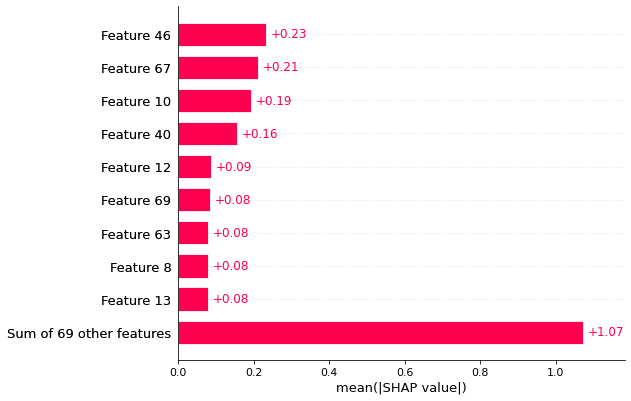

In [ ]:
shap.plots.bar(shap_values)

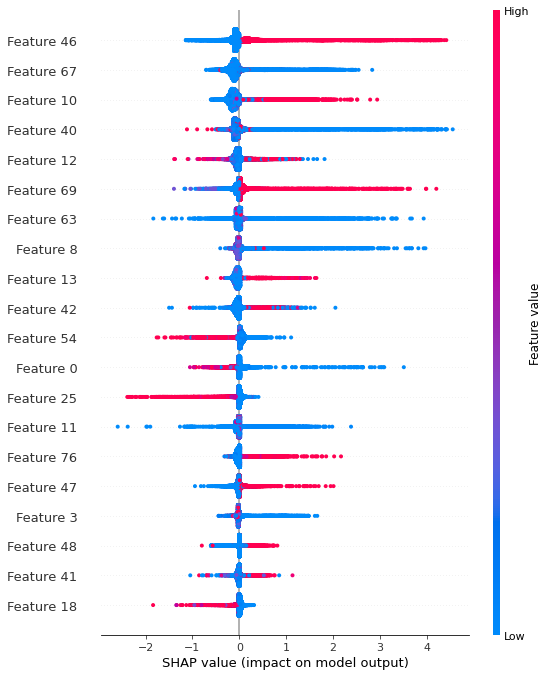

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.dependence_plot("", shap_values[0], X)

IndexError: ignored